In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.lines as lines

import copy 
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import sklearn                         # Llibreia de DM
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline  

from sklearn.naive_bayes import GaussianNB  # For numerical featuresm assuming normal distribution
from sklearn.naive_bayes import MultinomialNB  # For features with counting numbers (f.i. hown many times word appears in doc)
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportion_confint
from sklearn.model_selection import cross_val_score
import statistics as stat

from sklearn import tree


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# DECISION TREES


## First Approach
Decision tree with servere outliers in data, with multivariate outliers, without chategorial variables and without depth control. 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ArnauAlegre/Prova/main/sample_5000_con_outliers.csv")
data = data.iloc[:, 1:]

data.drop('artist_name', inplace=True, axis=1)
data.drop('track_name', inplace=True, axis=1)


In [ ]:
X = data.drop('music_genre', axis=1)
X = X.drop('key', axis=1)
X = X.drop('mode', axis=1)
y = data['music_genre']
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

0.4046666666666667


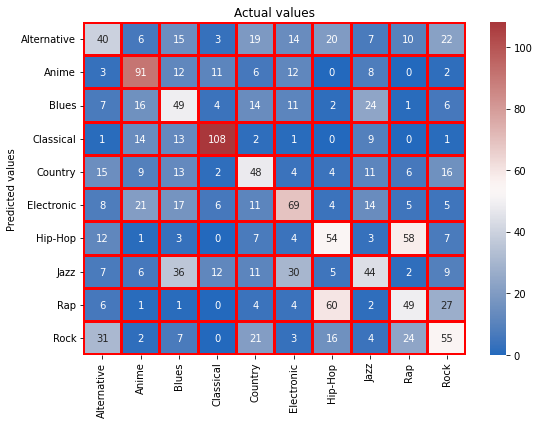

Accuracy: 0.4046666666666667

              precision    recall  f1-score   support

 Alternative       0.31      0.26      0.28       156
       Anime       0.54      0.63      0.58       145
       Blues       0.30      0.37      0.33       134
   Classical       0.74      0.72      0.73       149
     Country       0.34      0.38      0.35       128
  Electronic       0.45      0.43      0.44       160
     Hip-Hop       0.33      0.36      0.34       149
        Jazz       0.35      0.27      0.31       162
         Rap       0.32      0.32      0.32       154
        Rock       0.37      0.34      0.35       163

    accuracy                           0.40      1500
   macro avg       0.40      0.41      0.40      1500
weighted avg       0.40      0.40      0.40      1500

Interval of confidence: (0.37997670482416424, 0.42998557479480065)

Accuracy: 0.4046666666666667

              precision    recall  f1-score   support

 Alternative       0.31      0.26      0.28       156
    

In [ ]:

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
#We won't print the tree because it does not have a defined depth and it could take up a lot of time to process

## Decision tree without outliers
We will now take into consideration categorical variables, we will exclude multivariate outliers from the dataset and we will define a minimum sample size and minimum impurity decrease.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ArnauAlegre/Prova/main/sample_5000_sin_outliers.csv")
data = data.iloc[:, 1:]

data.drop('artist_name', inplace=True, axis=1)
data.drop('track_name', inplace=True, axis=1)

In [3]:
# Separate data from labels

X = data.drop('music_genre', axis=1)
y = data['music_genre']
X = X.drop('key', axis=1)
X = X.drop('mode', axis=1)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=42)

0.44452247191011235


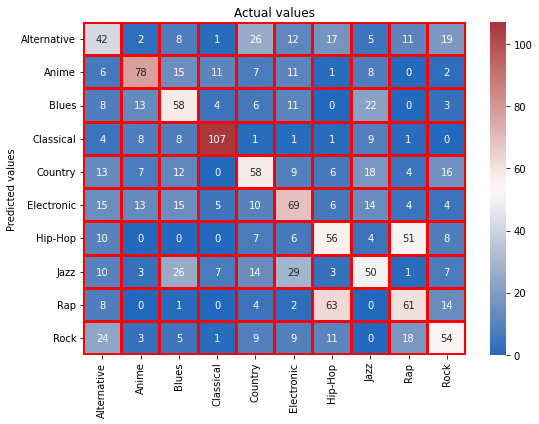

Accuracy: 0.44452247191011235

              precision    recall  f1-score   support

 Alternative       0.30      0.29      0.30       143
       Anime       0.61      0.56      0.59       139
       Blues       0.39      0.46      0.42       125
   Classical       0.79      0.76      0.78       140
     Country       0.41      0.41      0.41       143
  Electronic       0.43      0.45      0.44       155
     Hip-Hop       0.34      0.39      0.37       142
        Jazz       0.38      0.33      0.36       150
         Rap       0.40      0.40      0.40       153
        Rock       0.43      0.40      0.41       134

    accuracy                           0.44      1424
   macro avg       0.45      0.45      0.45      1424
weighted avg       0.45      0.44      0.45      1424

Interval of confidence: (0.4188744432167979, 0.4704996911966558)

Accuracy: 0.44452247191011235

              precision    recall  f1-score   support

 Alternative       0.30      0.29      0.30       143
    

In [4]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

## Decision tree with some optimizations
We now have seen that the treatment of outliers in the data increases the accuracy of the model, so we will use the entire dataset with the deletion of severe outliers and multivariate outliers and we will apply some extra optimizations.

In [ ]:
# Separate data from labelsa
data = pd.read_csv("https://raw.githubusercontent.com/ArnauAlegre/Prova/main/sample_5000_sin_outliers.csv")
data = data.iloc[:, 1:]
data.drop('artist_name', inplace=True, axis=1)
data.drop('track_name', inplace=True, axis=1)
y = data['music_genre']
X = data.drop('music_genre', axis=1)
X = pd.get_dummies(X)
#convert categorical variables to numeric so we can use them in decision tree
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=42)
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_impurity_decrease=0.02)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))

0.4066011235955056


With the optimizations added, we get a worse result than without the optimizations so we will analyze what is happening. The bad results could be due to the introduction of the dummy variables or most likely to the introduction of the tree depth control mechanisms.

We will check the feature importance of the variables used to compute the decision tree and we will remove those that have no importance.

In [ ]:
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df


,Feature,Importance
0,popularity,0.603
1,acousticness,0.170
2,speechiness,0.087
3,danceability,0.053
4,instrumentalness,0.048
5,loudness,0.039
6,duration_s,0.000
7,tempo,0.000
8,valence,0.000
9,energy,0.000


Finally, to improve the performance a bit, we will reduce the minimum impurity decrease and add a max depth of 4 so that we end up with a readable tree. We will also reduce the test size, so that our tree does not overfit too much.

In [ ]:
y = data['music_genre']
X = data.drop('music_genre', axis=1)
X = X.drop('key', axis=1)
X = X.drop('mode', axis=1)
X = X.drop('duration_s', axis=1)
X = X.drop('tempo', axis=1)
X = X.drop('valence', axis=1)
X = X.drop('energy', axis=1)
X = X.drop('liveness', axis=1)
X = X.drop('loudness', axis=1)
#convert categorical variables to numeric so we can use them in decision tree
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.1, random_state=42)
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_impurity_decrease=0.01)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))

feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

#cross validated accuracy
print(stat.mean(cross_val_score(estimator=clf, X=X, y=y, n_jobs=-1)))

0.4231578947368421
0.4166491043203372


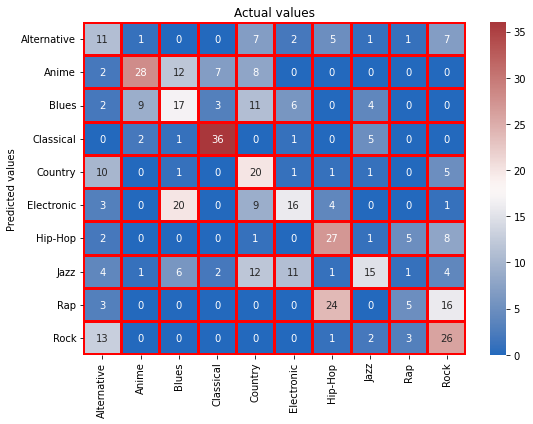

Accuracy: 0.4231578947368421

              precision    recall  f1-score   support

 Alternative       0.22      0.31      0.26        35
       Anime       0.68      0.49      0.57        57
       Blues       0.30      0.33      0.31        52
   Classical       0.75      0.80      0.77        45
     Country       0.29      0.51      0.37        39
  Electronic       0.43      0.30      0.36        53
     Hip-Hop       0.43      0.61      0.50        44
        Jazz       0.52      0.26      0.35        57
         Rap       0.33      0.10      0.16        48
        Rock       0.39      0.58      0.46        45

    accuracy                           0.42       475
   macro avg       0.43      0.43      0.41       475
weighted avg       0.45      0.42      0.41       475

Interval of confidence: (0.3788671374867574, 0.4684009521881719)


In [ ]:
#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))


# Graphviz

In [5]:
import graphviz

y_aux = pd.get_dummies(y)

dot_data = tree.export_graphviz(clf, out_file='tree.dot', 
  feature_names=X.columns,  
  class_names=y_aux.columns,  
  filled=True, rounded=True,  
  special_characters=True,
  impurity=False,
  label="all")  
graph = graphviz.Source(dot_data)  
graph

import pydotplus as pydot
import re
PATH = '/content/tree.dot'
f = pydot.graph_from_dot_file(PATH).to_string()
f = re.sub('value = \[[0-9]+, [0-9]+, [0-9]+\]', '', f)
f = re.sub('(samples = [0-9]+)(value = \[[0-9]+, [0-9]+, [0-9]+\])\\\\n', '', f)

with open('tree_modified.dot', 'w') as file:
    file.write(f)
  
from subprocess import check_call
check_call(['dot','-Tpng','tree_modified.dot','-o','OutputFile.png'])
#graph.render('dtree_render_'+'tree.png',view=True)

0

We now get a pretty decent result with a tree that is understandable. But let's try to push the limits by tweaking some parameters

In [ ]:
#let's try to find the best depth for the tree
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, n_jobs=-1)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.5897348911818261), (4, 0.6173881470562733), (5, 0.6769845226740657), (6, 0.6868616144975289), (7, 0.6759922613370328), (8, 0.6769856065204196), (9, 0.6773118442729559), (10, 0.6621678010925172), (11, 0.6611744559091304), (12, 0.6565637735194658), (13, 0.6595270094511403), (14, 0.6608422570016474), (15, 0.6512924867770744), (16, 0.6605219804040579), (17, 0.6615131578947369), (18, 0.6535994537414377), (19, 0.6582074265152171)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


0.6578947368421053


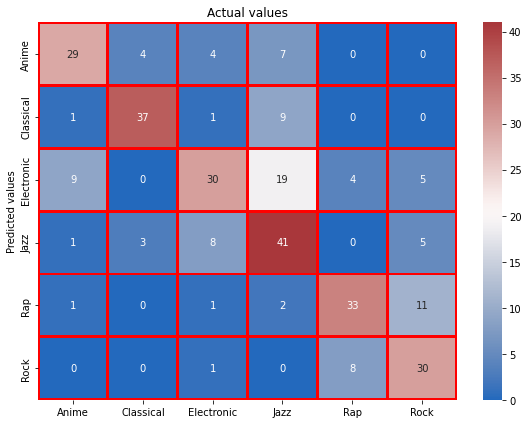

Accuracy: 0.6578947368421053

              precision    recall  f1-score   support

       Anime       0.71      0.66      0.68        44
   Classical       0.84      0.77      0.80        48
  Electronic       0.67      0.45      0.54        67
        Jazz       0.53      0.71      0.60        58
         Rap       0.73      0.69      0.71        48
        Rock       0.59      0.77      0.67        39

    accuracy                           0.66       304
   macro avg       0.68      0.67      0.67       304
weighted avg       0.67      0.66      0.66       304

Interval of confidence: (0.6020817826234147, 0.7098339716389391)


In [ ]:

#we will now delete some music genres that worsen our accuracy score
data_v2 = data[data.music_genre != 'Alternative']
data_v2 = data_v2[data.music_genre != 'Blues']
#data_v2 = data_v2[data.music_genre != 'Anime']
#data_v2 = data_v2[data.music_genre != 'Jazz']
#data_v2 = data_v2[data.music_genre != 'Rap']
#data_v2 = data_v2[data.music_genre != 'Rock']
data_v2 = data_v2[data.music_genre != 'Country']
#data_v2 = data_v2[data.music_genre != 'Classic']
data_v2 = data_v2[data.music_genre != 'Hip-Hop']

y = data_v2['music_genre']
X = data_v2.drop('music_genre', axis=1)
X = pd.get_dummies(X)
#convert categorical variables to numeric so we can use them in decision tree
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.1, random_state=42)

clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

# Bibiography
https://www.musicianonamission.com/spotify-lufs/#:~:text=LUFS%20measure%20how%20loud%20a,ll%20want%20to%20use%20LUFS
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33
https://www.machinelearningplus.com/plots/python-scatter-plot/
https://datatofish.com/check-nan-pandas-dataframe/
https://www.kaggle.com/code/anetakovacheva/interpreting-a-music-genre-classifier/notebook


